In [1]:
# relevant modules
import numpy as np

###  Exercise 1: A ball dropped from a tower

In [2]:
height = 100
def time_taken_to_reach_ground(height):
    time = (2*height/9.8)**0.5
    return time

time_taken_to_reach_ground(100)

4.5175395145262565

###  Exercise 2: Altitude of a satellite

#### a)

In [3]:
G = 6.6743E-11
M = 5.972E24
R = 6.371E6
def altitude_of_revol(time): # time in sec
    r = ((G*M)*time**2/(4*np.pi**2))**(1/3)
    alt = r - R
    return alt

#### b)

In [4]:
print(f"Altitude every 24 hrs is {altitude_of_revol(24 * 3600)/ 1000:.3f} km")

print(f"Altitude every 90 mins is {altitude_of_revol(90 * 60)/ 1000:.3f} km")

print(f"Altitude every 45 mins is {altitude_of_revol(45 * 60)/1000:.3f} km")

Altitude every 24 hrs is 35869.698 km
Altitude every 90 mins is 281.493 km
Altitude every 45 mins is -2180.192 km


From the last calculation, we conclude that for a satellite to revolve so fast, it should be closer to the centre of the earth than the radius of the earth due to strong requirement of centripital force.

#### c)
24 hrs is time taken for Sun to be in the same position wrt stars (solar day) whlie 23.93 hrs is the time it takes for the Earth to actually rotate wrt the to the stars.

In [5]:
print(f"Difference of altitude between the two orbits is {(altitude_of_revol(24*3600) - altitude_of_revol(23.93 * 3600))/1000:.3f} km")

Difference of altitude between the two orbits is 82.175 km


### Exercise 3

In [6]:
def polar_coords(x, y):
    r = (x**2 + y**2)**0.5
    theta = np.arctan(y/x)*180.0/np.pi
    return r, theta 

r, theta = polar_coords(1,2)
print(f"Polar coordinates of (1,2) are {(r, theta)}")

Polar coordinates of (1,2) are (2.23606797749979, 63.43494882292201)


###  Exercise 4

In [7]:
def time_wrt_rest(x, v):
    return x/v # time in years

def time_wrt_traveller(x, v):
    gamma = 1/(1- v**2)**0.5
    return x/v/gamma

print(f"Time taken to travel 10 light years at 0.99c is {time_wrt_rest(10, 0.99):.3f} years in rest frame and {time_wrt_traveller(10, 0.99):.3f} years in passengers's frame.")   

Time taken to travel 10 light years at 0.99c is 10.101 years in rest frame and 1.425 years in passengers's frame.


###  Exercise 5: Quantum potential step

In [8]:
def quantum_step(m, E, V):
    h_bar = 1.05E-34
    E *= 1.6E-19 # conversion to joule 
    V *= 1.6E-19
    k1 = ((2*m/h_bar)*(E/h_bar))**0.5
    k2 = ((2*m/h_bar)*(E - V)/h_bar)**0.5
    reflection_prob = ((k1 - k2)/(k1 + k2))**2
    transmission_prob = 4*k1*k2/(k1 + k2)**2
    return reflection_prob, transmission_prob

refl_prob, transm_prb = quantum_step(9.11E-31, 10, 9)
print(f"For the given values of mass, energy and potential, the reflection probability is {refl_prob:.3f} and transmission probability is {transm_prb:.3f}")


For the given values of mass, energy and potential, the reflection probability is 0.270 and transmission probability is 0.730


### Exercise 6: Catalan numbers

In [9]:
def catalan_numbers(upper_bound):
    C_n = 1
    n = 0
    while C_n <= upper_bound:
        print(C_n)
        C_n *= (4*n + 2)/(n + 2)
        n += 1

catalan_numbers(1E9)

1
1.0
2.0
5.0
14.0
42.0
132.0
429.0
1430.0
4862.0
16796.0
58786.0
208012.0
742900.0
2674440.0
9694845.0
35357670.0
129644790.0
477638700.0


###  Exercise 7: The Madelung constant

In [10]:
def potential(i, j, k):
    # const = e/(4*pi*epsilon_not) = 1
    potential = 1/(i**2 + j**2 + k**2)**0.5
    return potential

def total_potential_old(lower, upper):
    V = 0
    for i in range(lower, upper):
        for j in range(lower, upper):
            for k in range(lower, upper):
                if (i,j,k) != (0,0,0):
                    if (i + j + k) % 2 == 0:
                        V += potential(i, j, k)
                    else: 
                        V -= potential(i, j, k)
    return V

def total_potential(lower, upper):
    indices = np.arange(lower, upper)
    i, j, k = np.meshgrid(indices, indices, indices, indexing='ij')
    indices_not_origin = (i != 0) | (j != 0) | (k != 0)
    potentials = potential(i, j, k)
    sign = np.where((i + j + k)%2 == 0, 1, -1)
    V = np.sum(sign[indices_not_origin] * potentials[indices_not_origin])
    return V

total_potential(-100, 100)
print(f"The value of Madelung constant is estimated as {total_potential(-100, 100):.4f}")

C:\Users\Dell\AppData\Local\Temp\ipykernel_19588\2687773383.py:3: RuntimeWarning: divide by zero encountered in divide
  potential = 1/(i**2 + j**2 + k**2)**0.5


The value of Madelung constant is estimated as -1.7476


###  Exercise 8: The semi-empirical mass formula
#### a)

In [11]:
def binding_energy(A, Z):
    a1, a2, a3, a4 = 15.67, 17.23, 0.75, 93.4
    if A % 2 == 0:
        a5 = 0.0
    else:
        if Z % 2 == 0:
            a5 = 12.0
        else:
            a5 = -12.0
    B = a1*A - a2*A**(2/3) - a3* Z**2 /A**(1/3) - a4*(A -2*Z)**2/A + a5/A**0.5
    return B

print(f" Binding energy for A = 58 and Z = 28 is {binding_energy(58, 28):.3f} MeV")
    

 Binding energy for A = 58 and Z = 28 is 492.346 MeV


#### b)

In [12]:
def binding_energy_per_nucleon(A, Z):
    # vectorized code for efficiency
    A, Z = np.asarray(A), np.asarray(Z)
    a1, a2, a3, a4 = 15.67, 17.23, 0.75, 93.4
    a5 = np.zeros_like(A) 
    even_A = (A % 2 == 0)
    even_Z = (Z % 2 == 0)
    a5[~even_A & even_Z] = 12.0   # Odd A, even Z
    a5[~even_A & ~even_Z] = -12.0 # Odd A, odd Z
    B = a1*A - a2*A**(2/3) - a3* Z**2 /A**(1/3) - a4*(A -2*Z)**2/A + a5/A**0.5
    return B/A
print(f" Binding energy per nucleon for A = 58 and Z = 28 is {binding_energy_per_nucleon(58, 28):.3f} MeV/n")

 Binding energy per nucleon for A = 58 and Z = 28 is 8.489 MeV/n


#### c)

In [13]:
def stable_nucleus_A(Z):
    A_array = np.arange(Z, 3*Z+1)
    B_per_nucleons = binding_energy_per_nucleon(A_array, Z)

    return A_array[np.argmax(B_per_nucleons)], B_per_nucleons[np.argmax(B_per_nucleons)], B_per_nucleons

A, B, Barray = stable_nucleus_A(28)
print(A, B)

57 8.511600524573389


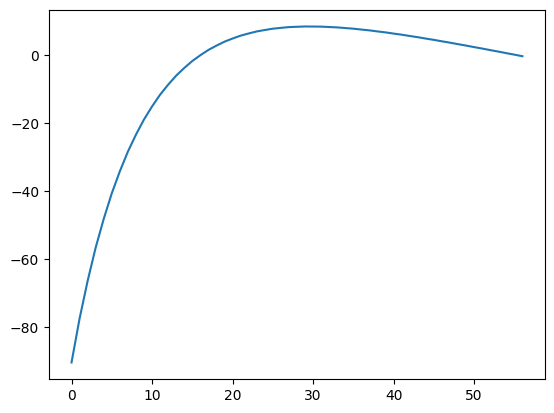

In [14]:
import matplotlib.pyplot as plt
plt.plot(Barray)

#### d)

In [17]:
def stable_nucleus_A_100(Z):
    A_array = np.arange(1, 101)
    B_per_nucleons = binding_energy_per_nucleon(A_array, Z)
    return A_array[np.argmax(B_per_nucleons)], B_per_nucleons[np.argmax(B_per_nucleons)], B_per_nucleons

A, B, Barray = stable_nucleus_A_100(28)
print(A, B)
# fuck fix this

57 8.511600524573389


### Exercise 9: Binomial coefficients